## Steps To Perform
1. Data Cleaning
2. Feature Transformation
3. Encoding
4. Feature Scaling
5. Target Transformation
6. Splitting Data
7. Model Training
8. Submission

Importing libraries

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import  KFold, cross_val_score

Configuration to see whole data in one cell

In [2]:
pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", 90)

Reading train & test data from csv files

In [3]:
train = pd.read_csv('/Users/lalit/Desktop/ML/Housing Dataset Analysis/house-prices-advanced-regression-techniques/train.csv') 
test = pd.read_csv('/Users/lalit/Desktop/ML/Housing Dataset Analysis/house-prices-advanced-regression-techniques/test.csv') 

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Retaining Ids for future purpose
train_id, test_id = train['Id'], test['Id']

In [7]:
#Dropping Id column as it doesn't impact the prediction
train.drop(columns=['Id'], axis=1, inplace=True)
test.drop(columns=['Id'], axis=1, inplace=True)

In [8]:
#Retaining SalePrice and dropping as we would be combining train & test data
train_saleprice = train['SalePrice']
train.drop(columns=['SalePrice'], axis=1, inplace=True)

In [9]:
train_id, test_id, train_saleprice

(0          1
 1          2
 2          3
 3          4
 4          5
         ... 
 1455    1456
 1456    1457
 1457    1458
 1458    1459
 1459    1460
 Name: Id, Length: 1460, dtype: int64,
 0       1461
 1       1462
 2       1463
 3       1464
 4       1465
         ... 
 1454    2915
 1455    2916
 1456    2917
 1457    2918
 1458    2919
 Name: Id, Length: 1459, dtype: int64,
 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64)

In [10]:
#Combining train & test data as it will be more insightfull and dont need to do the seperate processes again for test data
#In production envs, pipelines are created to perform processing on test data similar to which was done while training
data = pd.concat([train, test]).reset_index(drop=True)

In [11]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

 ### Data Cleaning - Removing Missing Values

In [12]:
data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [13]:
catg_null_cols = [column for column in data if data[column].dtype == 'O' and data[column].isnull().sum() > 0]
len(catg_null_cols)

23

In [14]:
#Replacing null with None for columns where NA is a seperate category
for column in ['Alley',
               'BsmtQual',
               'BsmtCond',
               'BsmtExposure',
               'BsmtFinType1',
               'BsmtFinType2',
               'FireplaceQu',
               'GarageType',
               'GarageFinish',
               'GarageQual',
               'GarageCond',
               'PoolQC',
               'Fence',
               'MiscFeature'
              ]:
    data[column].fillna("None", inplace = True)


#Replacing null with mode for columns where NA is not a seperate category
for column in ['MSZoning',
               'Utilities',
               'Exterior1st',
               'Exterior2nd',
               'MasVnrType',
               'Electrical',
               'KitchenQual',
               'Functional',
               'SaleType'
              ]:
    data[column].fillna(data[column].mode()[0], inplace = True)

In [15]:
data.select_dtypes('object').isna().sum().sum()

0

In [16]:
num_null_cols = [column for column in data if data[column].dtype != 'O' and data[column].isnull().sum() > 0]
len(num_null_cols)

11

In [17]:
for column in num_null_cols:
    data[column].fillna(data[column].mean(), inplace = True)

In [18]:
data.select_dtypes(np.number).isna().sum().sum()

0

In [19]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Feature Transformation - Distributing features normally

In [20]:
data.select_dtypes(np.number).columns
# num_cols = [column for column in data if data[column].dtype != 'O'

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [21]:
#Fetching skewed columns for which skew is greater than or equal to 0.5 (standard threshold is 0.5)
skewed_cols = [column for column in data.select_dtypes(np.number).columns if abs(st.skew(data[column])) >= 0.5]
skewed_cols
# len(skewed_cols)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [22]:
data[skewed_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,5.564577,1971.312778,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,0.380267,1.044536,6.451524,0.597122,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,42.517628,21.312345,7886.996359,1.113131,30.291442,178.626089,455.532750,169.176615,439.468337,440.690726,392.362079,428.701456,46.396825,506.051045,0.524556,0.245603,0.502872,0.214462,1.569379,0.646129,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,20.000000,21.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7478.000000,5.000000,1953.500000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.305795,9453.000000,5.000000,1973.000000,0.000000,369.000000,0.000000,467.000000,990.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,78.000000,11570.000000,6.000000,2001.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,1.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,2.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [23]:
for skewed_col in skewed_cols:
    data[skewed_col] = np.log1p(data[skewed_col])

In [24]:
#Not to worry if skewed columns are still there after log transform, one log transform is enough
skewed_cols = {column:abs(st.skew(data[column])) for column in data.select_dtypes(np.number).columns if abs(st.skew(data[column])) >= 0.5}
skewed_cols

{'LotFrontage': 1.0194612407127785,
 'LotArea': 0.50475055129892,
 'OverallCond': 0.7461828792022595,
 'YearBuilt': 0.6262153888824475,
 'MasVnrArea': 0.504572505911369,
 'BsmtFinSF1': 0.6181854502561571,
 'BsmtFinSF2': 2.458514787337212,
 'BsmtUnfSF': 2.159207314861969,
 'TotalBsmtSF': 4.98173665466563,
 'LowQualFinSF': 8.55769041866321,
 'BsmtHalfBath': 3.774246143156761,
 'HalfBath': 0.5806915253872976,
 'KitchenAbvGr': 3.520350639382798,
 'EnclosedPorch': 1.961080589820378,
 '3SsnPorch': 8.825255765053772,
 'ScreenPorch': 2.9459051310687494,
 'PoolArea': 14.99833472413935,
 'MiscVal': 5.213983641404962}

### Encoding Categorical Features - Converting Categorical features to numeric data 

In [25]:
data = pd.get_dummies(data=data, drop_first=True)

In [26]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.000000,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.000000,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.000000,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.000000,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.000000,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.791759,0.000000,1978.113406,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6,2006,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2915,5.081404,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,1,0.693147,3,0.693147,1.945910,0.000000,1970.000000,1.0

### Feature Scaling - Compare all features on same scale

In [27]:
#Performing MinMaxScalar as it is almost the first choice
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

In [28]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.483003,0.413268,0.366271,0.666667,0.682606,0.950951,0.883333,0.716038,0.759508,0.0,0.646838,0.774668,0.345070,0.884420,0.0,0.577436,0.5,0.00000,0.50,0.63093,0.375,0.5,0.656289,0.000000,0.346154,0.4,0.368280,0.000000,0.624312,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.490307,0.391245,0.555556,0.934536,0.760143,0.433333,0.000000,0.797188,0.0,0.728731,0.819153,0.487537,0.000000,0.0,0.469935,0.0,0.63093,0.50,0.00000,0.375,0.5,0.506159,0.430677,0.259615,0.4,0.309140,0.784977,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.483003,0.429990,0.422289,0.666667,0.682606,0.936906,0.866667,0.690361,0.716357,0.0,0.783246,0.782930,0.371528,0.886245,0.0,0.592825,0.5,0.00000,0.50,0.63093,0.375,0.5,0.506159,0.430677,0.339744,0.4,0.408602,0.000000,0.568957,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.551764,0.383633,0.390223,0.666667,0.682606,0.319286,0.333333,0.000000,0.622780,0.0,0.811361,0.760436,0.387529,0.868471,0.0,0.578882,0.5,0.00000,0.25,0.00000,0.375,0.5,0.585928,0.430677,0.330128,0.6,0.431452,0.000000,0.542079,0.810539,0.0,0.0,0.0,0.000000,0.090909,0.00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.483003,0.508439,0.468694,0.777778,0.682606,0.929878,0.833333,0.794318,0.750841,0.0,0.798858,0.808002,0.451824,0.911832,0.0,0.666289,0.5,0.00000,0.50,0.63093,0.500,0.5,0.719229,0.430677,0.336538,0.6,0.561828,0.724696,0.672040,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### Target Transformation - Distributing target normally (since we did for features)

<AxesSubplot: >

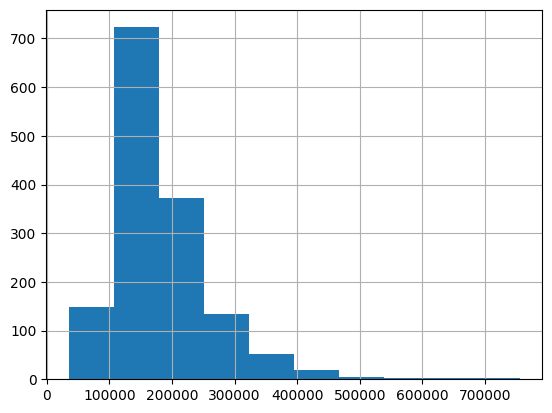

In [29]:
train_saleprice
train_saleprice.hist()

In [30]:
train_saleprice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
# Performing log tranform - No need to do log1p since min is not 0
log_target = np.log(train_saleprice)

In [42]:
log_target.describe()
#np.exp(log_target)

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

### Splitting Data

In [37]:
train_final = data.loc[:train.index.max(), :].reset_index(drop=True).copy()
test_final = data.loc[train.index.max()+1:, :].reset_index(drop=True).copy()

In [39]:
train_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.483003,0.413268,0.366271,0.666667,0.682606,0.950951,0.883333,0.716038,0.759508,0.000000,0.646838,0.774668,0.345070,0.884420,0.0,0.577436,0.5,0.00000,0.50,0.63093,0.375,0.5,0.656289,0.000000,0.346154,0.4,0.368280,0.000000,0.624312,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.490307,0.391245,0.555556,0.934536,0.760143,0.433333,0.000000,0.797188,0.000000,0.728731,0.819153,0.487537,0.000000,0.0,0.469935,0.0,0.63093,0.50,0.00000,0.375,0.5,0.506159,0.430677,0.259615,0.4,0.309140,0.784977,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.483003,0.429990,0.422289,0.666667,0.682606,0.936906,0.866667,0.690361,0.716357,0.000000,0.783246,0.782930,0.371528,0.886245,0.0,0.592825,0.5,0.00000,0.50,0.63093,0.375,0.5,0.506159,0.430677,0.339744,0.4,0.408602,0.000000,0.568957,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.551764,0.383633,0.390223,0.666667,0.682606,0.319286,0.333333,0.000000,0.622780,0.000000,0.811361,0.760436,0.387529,0.868471,0.0,0.578882,0.5,0.00000,0.25,0.00000,0.375,0.5,0.585928,0.430677,0.330128,0.6,0.431452,0.000000,0.542079,0.810539,0.0,0.0,0.0,0.000000,0.090909,0.00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.483003,0.508439,0.468694,0.777778,0.682606,0.929878,0.833333,0.794318,0.750841,0.000000,0.798858,0.808002,0.451824,0.911832,0.0,0.666289,0.5,0.00000,0.50,0.63093,0.500,0.5,0.719229,0.430677,0.336538,0.6,0.561828,0.724696,0.672040,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Model Training

 XGBoost Regressor

In [45]:
xg_model = XGBRegressor()

In [46]:
xg_model.fit(train_final, log_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluate - using cross validation since we didn't perform train-test split

In [48]:
kf = KFold(n_splits=10)
scores = cross_val_score(xg_model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)

In [49]:
# Negative Mean squared errors accross 10 folds (1 test * 9 trains - done for 10 times)
scores

array([-0.02004314, -0.01407721, -0.01500894, -0.02943209, -0.02610955,
       -0.01636457, -0.02492906, -0.01326872, -0.01774553, -0.01858182])

In [51]:
#Mean squared errors accross 10 folds
-scores

array([0.02004314, 0.01407721, 0.01500894, 0.02943209, 0.02610955,
       0.01636457, 0.02492906, 0.01326872, 0.01774553, 0.01858182])

In [56]:
#Average #Mean squared errors of 10 folds
np.mean(-scores)

0.019556061721494065

In [57]:
#Applying exp to match with original target since we did target log transform
np.exp(np.mean(-scores))

1.0197485341165096

### Sumbitting Results

In [58]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [63]:
predictions = np.exp(xg_model.predict(test_final))

In [69]:
submission = pd.concat([test_id, pd.Series(predictions, name='SalePrice')], axis=1)

In [70]:
submission

,Id,SalePrice
0,1461,124395.960938
1,1462,152438.562500
2,1463,180561.640625
3,1464,191907.765625
4,1465,178380.609375
...,...,...
1454,2915,77274.796875
1455,2916,83432.312500
1456,2917,170272.359375
1457,2918,115368.062500


In [71]:
submission.to_csv('submission.csv', index=False, header=True)